In [16]:
# !pip install matplotlib
import numpy as np
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt

In [17]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, lr=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learningrate = lr

        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.random.randn(hidden_size)

        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.random.randn(output_size)

    def relu(self, x):
        return np.maximum(0, x)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x))
        return exp_x / np.sum(exp_x)

    def forward(self, x):
        z1 = x.dot(self.W1) + self.b1
        a1 = self.relu(z1)
        z2 = a1.dot(self.W2) + self.b2
        y_pred = self.softmax(z2)
        return y_pred, a1

    def backward(self, X, y_true, a1):
        n = X.shape[0]
        total_loss = 0

        for i in range(n):
            y_pred, a1 = self.forward(X[i])
            loss = self.calculate_loss(y_true[i], y_pred)
            total_loss += loss

            dz2 = (y_pred - y_true[i]) / 1
            dW2 = a1.reshape(a1.shape[0], 1).dot(dz2.reshape(1, self.output_size))
            db2 = np.sum(dz2)

            da1 = dz2.dot(self.W2.T)
            dz1 = (da1 * (a1 > 0)).reshape(-1, 1)
            dW1 = X[i].reshape(1, -1).T.dot(dz1.T)
            db1 = np.sum(dz1, axis=1)

            self.W1 -= self.learningrate * dW1
            self.b1 -= self.learningrate * db1
            self.W2 -= self.learningrate * dW2
            self.b2 -= self.learningrate * db2

        self.loss = total_loss / n

    def calculate_loss(self, Y_True, Y_Pred):
        epsilon = 1e-7
        loss = -(Y_True * np.log(Y_Pred + epsilon) + (1 - Y_True) * np.log(1 - Y_Pred + epsilon))
        return loss

    def predict(self, X):
        y_pred = []
        for x in X:
            y_pred.append(self.forward(x)[0])
        return np.array(y_pred)

In [18]:
nn = NeuralNetwork(input_size=784, hidden_size=128, output_size=10, lr=0.001)

In [19]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [20]:
# Flatten the images
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# Normalize the pixel values
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Convert the labels to one-hot encoding
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

In [21]:
# Store losses for each epoch to plot them later
losses = []
accuracys = []

In [22]:
# Train the model
epochs = 5
batch_size = 64
for epoch in range(epochs):
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i + batch_size]
        y_batch = y_train[i:i + batch_size]
        nn.backward(X_batch, y_batch, nn.relu(X_batch.dot(nn.W1) + nn.b1))
    losses.append(np.mean(nn.loss))

    # Test the model
    y_pred = nn.predict(X_test)
    accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1))
    accuracys.append(accuracy)
    print(f"Epoch: {epoch + 1}/{epochs}, Loss: {np.mean(nn.loss)}, Accuracy: {accuracy:.4f}")

Epoch 1/5
Epoch: 1/5, Loss: 0.1612475808514769, Accuracy: 0.8783
Epoch 2/5
Epoch: 2/5, Loss: 0.1169863535102604, Accuracy: 0.8934
Epoch 3/5
Epoch: 3/5, Loss: 0.10649549194629053, Accuracy: 0.9004
Epoch 4/5
Epoch: 4/5, Loss: 0.09574898945529449, Accuracy: 0.9050
Epoch 5/5
Epoch: 5/5, Loss: 0.07938974082958085, Accuracy: 0.9083


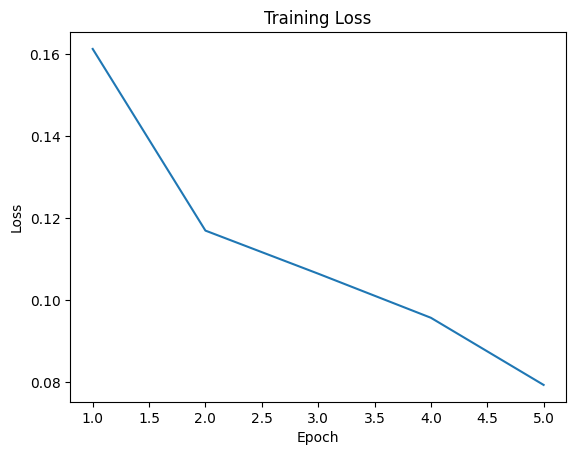

In [23]:
# Plot the training loss for each epoch
plt.plot(list(range(1,6)), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

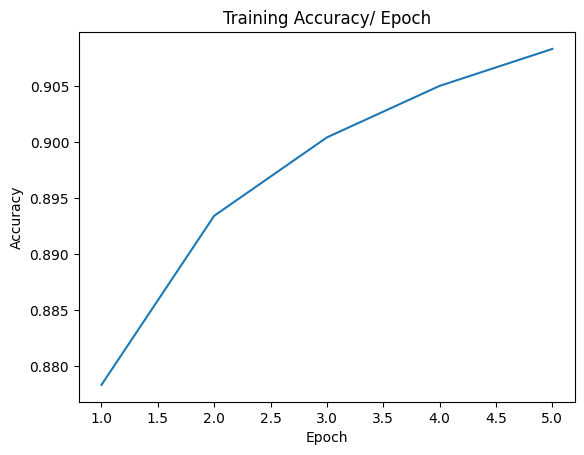

In [24]:
plt.plot(range(1,6), accuracys)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy/ Epoch')
plt.show()